
Agenda

*    What is the purpose of model evaluation, and what are some common evaluation procedures?
*    What is the usage of classification accuracy, and what are its limitations?
*    How does a confusion matrix describe the performance of a classifier?
*    What metrics can be computed from a confusion matrix?
*    How can you adjust classifier performance by changing the classification threshold?
*    What is the purpose of an ROC curve?
*    How does Area Under the Curve (AUC) differ from classification accuracy?



Review of model evaluation
    Need a way to choose between models: different model types, tuning parameters, and features
    Use a model evaluation procedure to estimate how well a model will generalize to out-of-sample data
    Requires a model evaluation metric to quantify the model performance


Model evaluation procedures

*    Training and testing on the same data
        Rewards overly complex models that "overfit" the training data and won't necessarily generalize
*    Train/test split
        Split the dataset into two pieces, so that the model can be trained and tested on different data
        Better estimate of out-of-sample performance, but still a "high variance" estimate
        Useful due to its speed, simplicity, and flexibility
*    K-fold cross-validation
        Systematically create "K" train/test splits and average the results together
        Even better estimate of out-of-sample performance
        Runs "K" times slower than train/test split



## Model evaluation metrics

*    Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
*    Classification problems: Classification accuracy


In [13]:
# read the data into a Pandas DataFrame
import pandas as pd
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
url = '/home/vijay/DATA_SCIENCE/Sparkds-for-telco-masterAndpy_churn/data/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [14]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#Question: Can we predict the diabetes status of a patient given their health measurements?

In [16]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [17]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
y_test[0:5]

661    1
122    0
113    0
14     1
529    0
Name: label, dtype: int64

In [18]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [20]:
y_pred_class[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [21]:
#Classification accuracy: percentage of correct predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.692708333333


In [24]:
# Check out what the null accuracy is
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [39]:
# presuming you had predicted all as 0 what would your acciracy be?
print(62/192) # or y_test.mean()
print(1-62/(192))

0.3229166666666667
0.6770833333333333


In [40]:
# this shows the model is not doing very awesome

In [41]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

In [42]:
print('True:', y_test.values[0:25])  # .values returns numpy
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Conclusion:

*    Classification accuracy is the easiest classification metric to understand
*    But, it does not tell you the underlying distribution of response values
*    And, it does not tell you what "types" of errors your classifier is making

In [43]:
# CONFUSION MATRIX
print(metrics.confusion_matrix(y_test,y_pred_class))

[[118  12]
 [ 47  15]]


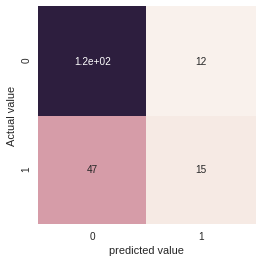

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = confusion_matrix(y_test,y_pred_class)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value')

# very few true positives


    Every observation in the testing set is represented in exactly one box
    It's a 2x2 matrix because there are 2 response classes
    The format shown here is not universal

Basic terminology

    True Positives (TP): we correctly predicted that they do have diabetes
    True Negatives (TN): we correctly predicted that they don't have diabetes
    False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
    False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")



In [49]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [51]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics computed from a confusion matrix

In [56]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


In [57]:
#Classification Error: Overall, how often is the classifier incorrect?
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


In [58]:
# Sensitivity or "True Positive Rate" or "Recall"
# How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


In [60]:
#Specificity: When the actual value is negative, how often is the prediction correct?
#How "specific" (or "selective") is the classifier in predicting positive instances?
print(TN / float(TN + FP))

0.907692307692


In [61]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP / float(TN + FP))

0.0923076923077


In [63]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


## Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc

Conclusion:

    Confusion matrix gives you a more complete picture of how your classifier is performing
    Also allows you to compute various classification metrics, and these metrics can guide your model selection

Which metrics should you focus on?

    Choice of metric depends on your business objective
    Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
    Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)



In [65]:
#Adjusting the classification threshold, only do this after trying out other models

In [66]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [72]:
print(logreg.classes_)
logreg.predict_proba(X_test)[0:10]

[0 1]


array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [80]:
#lst =logreg.predict_proba(X_test)[0:10]

In [81]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10,1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [82]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

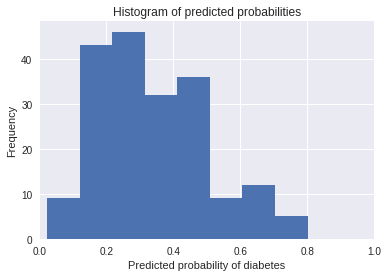

In [84]:
plt.rcParams['font.size'] = 14
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [85]:
# only the once more than 0.5 are treated as positive or 1
#Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [95]:
# predict diabetes if the predicted probability is greater than 0.3
# if your goal is to minimize False Negative
from sklearn.preprocessing import binarize
y_pred_class2 = binarize([y_pred_prob], 0.3)[0]  # feature value below 0.3 will be 0 rest 1

In [98]:
print(y_pred_class2[0:10])
print(y_pred_prob[0:10])

[ 1.  0.  0.  1.  0.  0.  1.  1.  0.  1.]
[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438]


In [99]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [100]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class2))

[[80 50]
 [16 46]]


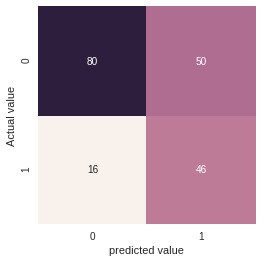

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = confusion_matrix(y_test,y_pred_class2)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value')


In [103]:
confusion = metrics.confusion_matrix(y_test, y_pred_class2)
TP = confusion[1,1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [104]:
FN

16

In [105]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [106]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


In [107]:
print(metrics.accuracy_score(y_test,y_pred_class2))

0.65625


## Conclusion:

    Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
    Threshold can be adjusted to increase sensitivity or specificity
    Sensitivity and specificity have an inverse relationship




ROC Curves and Area Under the Curve (AUC)

*Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

*Answer: Plot the ROC curve!


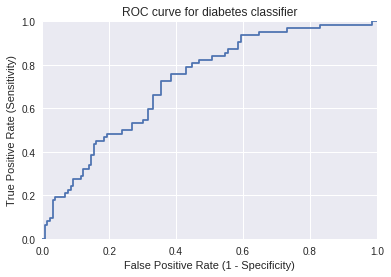

In [114]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)  # returns true positive rate,false postive rate 
#and threshold,which is max(y_score) + 1`
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [164]:


#    ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
#    You can't actually see the thresholds used to generate the curve on the ROC curve itself



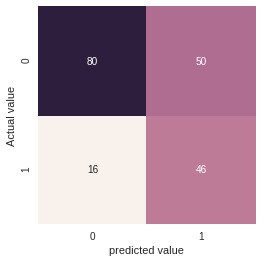

In [154]:
from sklearn.preprocessing import binarize
y_pred_class2 = binarize([y_pred_prob], 0.30)[0] 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = confusion_matrix(y_test,y_pred_class2)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value')


In [155]:
confusion = metrics.confusion_matrix(y_test, y_pred_class2)
TP = confusion[1,1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [156]:
# PRECISION ,WHEN POSITIVE IS PREDICTED HOW OFTEN S IT CORRECT
print(metrics.precision_score(y_test,y_pred_class2))
print(TP / float(TP + FP))

0.479166666667
0.479166666667


In [157]:
# accuracy score
print((TP + TN) / float(TP + TN + FP + FN))
# sensitivity has increased (used to be 0.24) or recall
print(TP / float(TP + FN))
# specificity has decreased (used to be 0.91) WHEN ACTUAL VAL IS NEGATIVE
print(TN / float(TN + FP))

0.65625
0.741935483871
0.615384615385


In [159]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [160]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [161]:
evaluate_threshold(0.3)

Sensitivity: 0.725806451613
Specificity: 0.615384615385


In [162]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


In [163]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.73782336182336183



##  Confusion matrix advantages:

    Allows you to calculate a variety of metrics
    Useful for multi-class problems (more than two response classes)

## ROC/AUC advantages:

    Does not require you to set a classification threshold
    Still useful when there is high class imbalance
    AUC is useful as a single number summary of classifier performance.
If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
AUC is useful even when there is high class imbalance (unlike classification accuracy)





Confusion Matrix Resources

    Blog post: Simple guide to confusion matrix terminology by me
    Videos: Intuitive sensitivity and specificity (9 minutes) and The tradeoff between sensitivity and specificity (13 minutes) by Rahul Patwari
    Notebook: How to calculate "expected value" from a confusion matrix by treating it as a cost-benefit matrix (by Ed Podojil)
    Graphic: How classification threshold affects different evaluation metrics (from a blog post about Amazon Machine Learning)

ROC and AUC Resources

    Lesson notes: ROC Curves (from the University of Georgia)
    Video: ROC Curves and Area Under the Curve (14 minutes) by me, including transcript and screenshots and a visualization
    Video: ROC Curves (12 minutes) by Rahul Patwari
    Paper: An introduction to ROC analysis by Tom Fawcett
    Usage examples: Comparing different feature sets for detecting fraudulent Skype users, and comparing different classifiers on a number of popular datasets

Other Resources

    scikit-learn documentation: Model evaluation
    Guide: Comparing model evaluation procedures and metrics by me
    Video: Counterfactual evaluation of machine learning models (45 minutes) about how Stripe evaluates its fraud detection model, including slides

Comments or Questions?

    Email: kevin@dataschool.io
    Website: http://dataschool.io
    Twitter: @justmarkham



In [ ]:
# BILD SAME USING RANDOM FOREST

In [ ]:
#X_train, X_test, y_train, y_test

In [166]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

In [182]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
y_pred_class3 = binarize([predictions], 0.30)[0] 

In [183]:
y_pred_class3[0:10]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [184]:
y_test.values[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [185]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, predictions))

0.755086848635


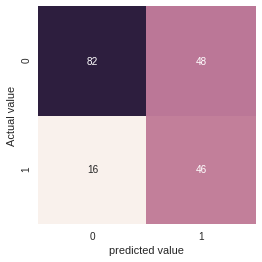

In [186]:

mat = confusion_matrix(y_test,y_pred_class3)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value')


In [ ]:
# improved accuracy 